In [18]:
import pandas as pd
import numpy as np
import time, datetime
from sklearn import datasets, linear_model

#import matplotlib
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn
import seaborn as sns

#local plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Data definitions from Spotify

- Beats Per Minute (BPM) — The tempo of the song.
- Energy — The energy of a song, the higher the value, the more energetic.
- Danceability — The higher the value, the easier it is to dance to this song.
- Loudness — The higher the value, the louder the song (in dB).
- Valence — The higher the value, the more positive mood for the song.
- Length — The duration of the song.
- Acousticness — The higher the value the more acoustic the song is.
- Release Year — The year each song was released.
- Popularity — The higher the value the more popular the song is.

## Upload CSV of all Kanye albums

- update `release` to date_time
- convert `length` to Minutes:Seconds
- after converting `length`, calculate how long each song is by seconds

In [2]:
df = pd.read_csv("kanye_playlist.csv", encoding = 'cp1252') #encoding cp1252 needed

In [3]:
#change release to date format
df['release'] = pd.to_datetime(df['release'])

#convert length to time
df['length'] = df['length'].apply(lambda x: time.strptime(x,'%M:%S'))

In [4]:
#find how many seconds each song is

df['length'] = df['length'].apply(lambda x: datetime.timedelta(minutes=x.tm_min, seconds=x.tm_sec).seconds)

In [5]:
df.head()

,order,title,album,artist,release,bpm,energy,dance,loud,valence,length,acoustic,pop
0,1,Ultralight Beam,The Life of Pablo,Kanye West,2016-06-10,107,39,60,-9,36,321,64,72
1,2,Father Stretch My Hands Pt. 1,The Life of Pablo,Kanye West,2016-06-10,113,57,71,-4,43,136,14,75
2,3,Pt. 2,The Life of Pablo,Kanye West,2016-06-10,145,72,67,-4,27,130,58,68
3,4,Famous,The Life of Pablo,Kanye West,2016-06-10,174,74,47,-4,43,196,6,75
4,5,Feedback,The Life of Pablo,Kanye West,2016-06-10,100,56,84,-6,16,147,59,63


## Histogram Plot for average `pop` of each `album`


In [60]:
df_pop = pd.pivot_table(df,index=["album"],values=["pop"],aggfunc=[np.mean, np.max,np.min]).reset_index()

In [61]:
#drop level from pivot table
df_pop.columns = df_pop.columns.droplevel(1)

In [62]:
df_pop

,album,mean,amax,amin
0,808s & Heartbreak,56.000,70,46
1,Graduation,61.462,76,53
2,Late Registration,50.143,74,0
3,My Beautiful Dark Twisted Fantasy,60.308,74,50
4,The College Dropout,51.619,66,2
5,The Life of Pablo,65.650,75,56
6,Yeezus,59.000,71,52


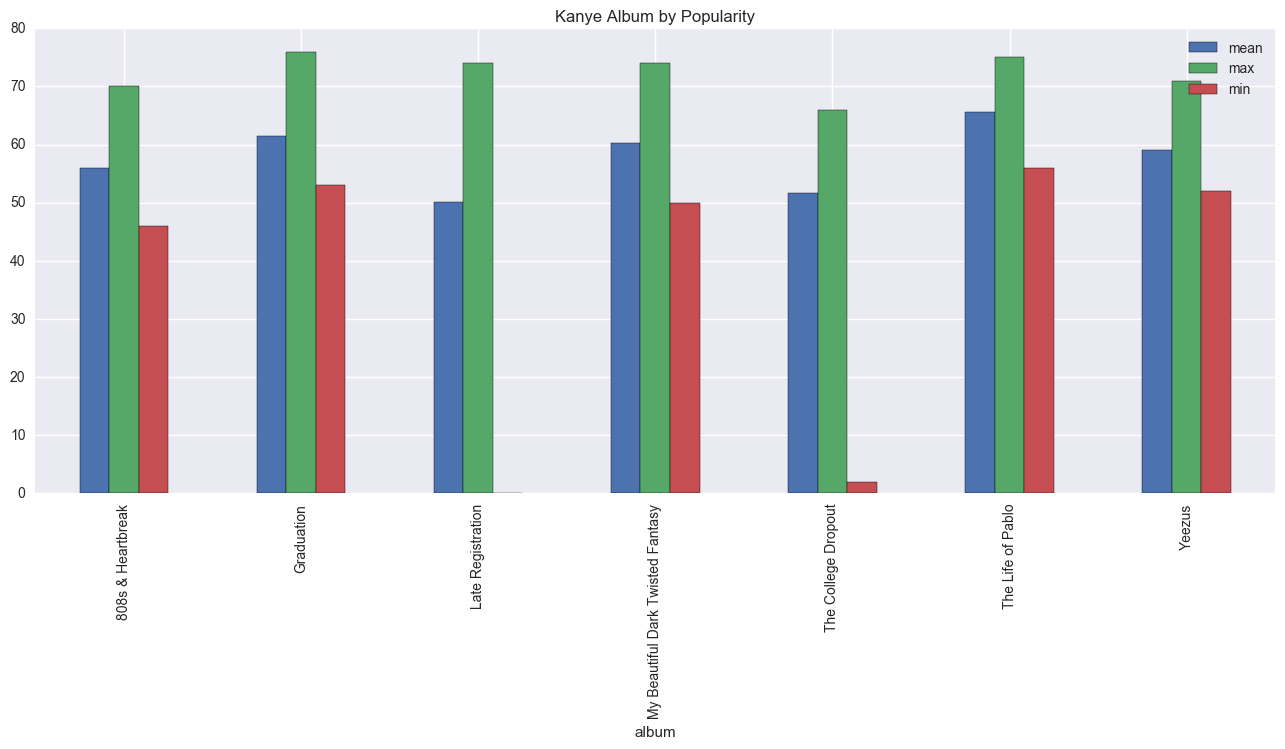

In [75]:
#df_line = df[['title','length']]
ax = df_pop.plot(title="Kanye Album by Popularity",legend=True, kind='bar',figsize=[16,6], x = df_pop['album'])

ax.legend(['mean','max','min'])

#for saving it later
#fig = purchase_plot.get_figure()
#fig.savefig("total-sales.png")

In [79]:
#plotly
# Create a trace
trace1 = go.Bar(
    x = df_pop['album'],
    y = df_pop['mean'],
    name = 'Average'
)

trace2 = go.Bar(
    x = df_pop['album'],
    y = df_pop['amax'],
    name = 'Max'
)

trace3 = go.Bar(
    x = df_pop['album'],
    y = df_pop['amin'],
    name = "Min"
)

data = [trace1,trace2,trace3]

layout = go.Layout(
    barmode='group',
    title = "Popularity of Kanye West's Albums"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

## Distribution of Kanye West

In [80]:
df.shape

(110, 13)

/Users/michael.aguenza/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



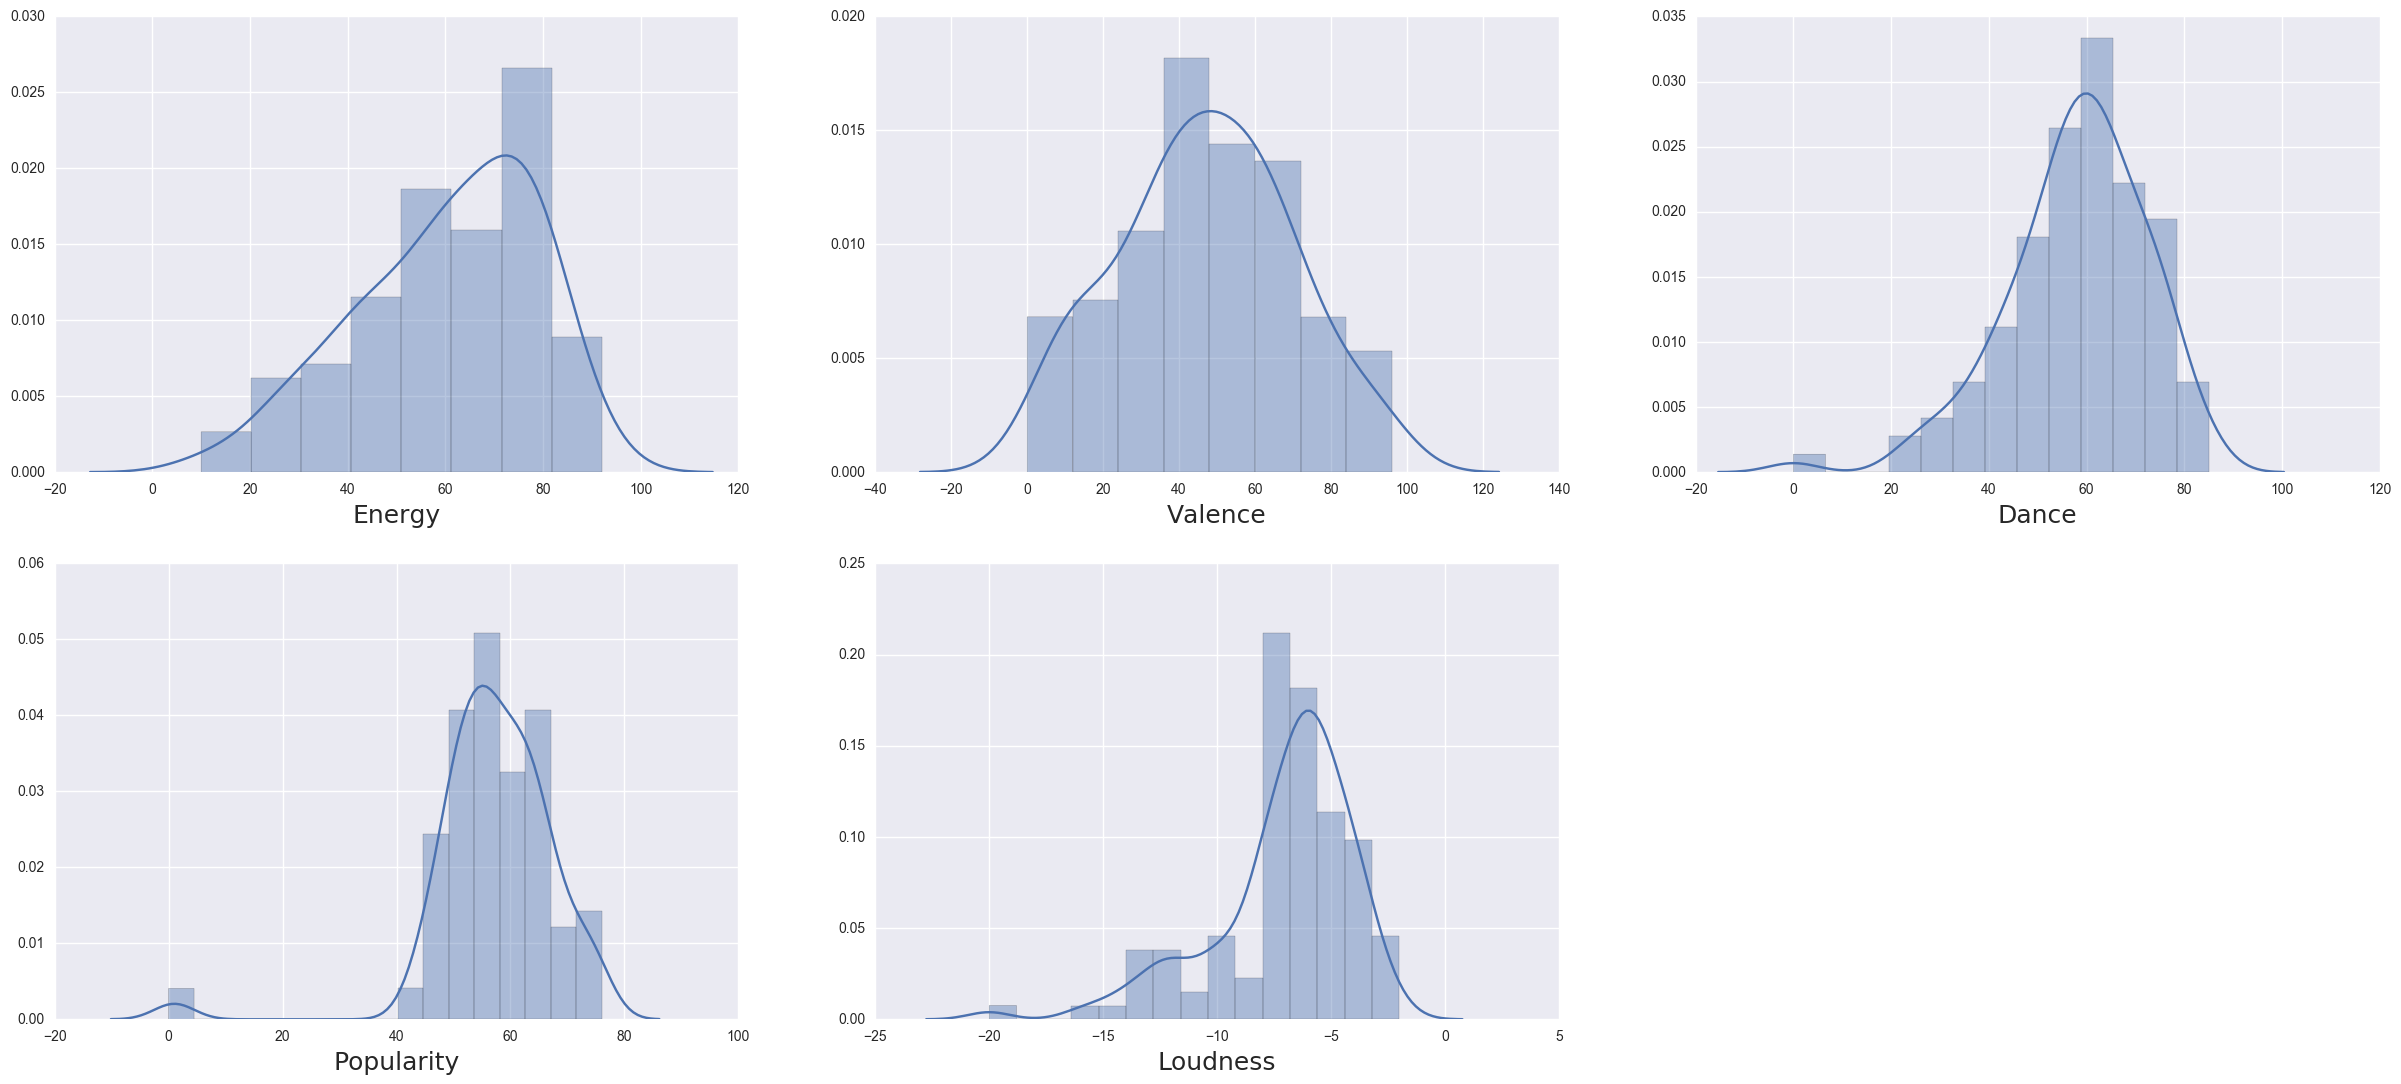

In [82]:

plt.figure(1, figsize=(30, 20),)

hfont = {'fontname':'Proxima Nova'}

plt.subplot(331)
sns.distplot(df['energy']);
#plt.text(10, .010, r'$\mu=\ 121.12$', fontsize=22)
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(332)
sns.distplot(df['valence']);
#plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Valence', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(df['dance']);
#plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Dance', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(334)
sns.distplot(df['pop']);
#plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Popularity', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(335)
sns.distplot(df['loud']);
#plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Loudness', fontsize=18, **hfont)
plt.grid(True)

In [86]:
trace1 = go.Histogram(
    x = df['pop'],
    opacity=0.60,
    name = 'Pop'
)
trace2 = go.Histogram(
    x=df['energy'],
    opacity=0.60,
    name = 'Energy'
)
trace3 = go.Histogram(
    x=df['dance'],
    opacity=0.60,
    name = 'Dance'
)

data = [trace1, trace2, trace3]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

## Correlation against BPM Heat Maps

In [87]:
corr_df = df.copy() #df.corr(method='pearson')

In [90]:
corr_df.head()

,dance,loud,valence,length,acoustic,pop
0,60,-9,36,321,64,72
1,71,-4,43,136,14,75
2,67,-4,27,130,58,68
3,47,-4,43,196,6,75
4,84,-6,16,147,59,63


In [89]:
corr_df = corr_df.drop(corr_df.columns[[0,1,2,3,4,5,6]], axis=1) 

In [91]:
corr_df = corr_df.corr(method = 'pearson')

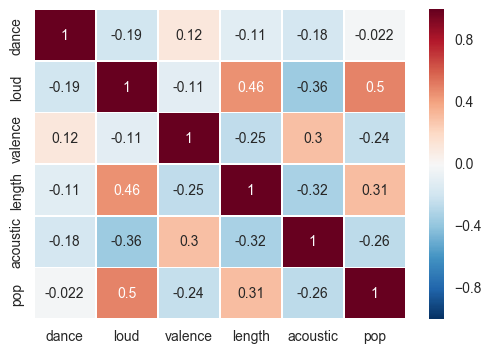

In [92]:
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,
            linewidths=0.5, annot=True)

In [94]:

trace1 = go.Heatmap(
    z=corr_df.values.tolist(),  # correlation as color contours 
    x=corr_df.columns.tolist(),      # sites on both
    y=corr_df.columns.tolist(),      #  axes
    zauto=False,  # (!) overwrite Plotly's default color levels
    zmin=0.4,     # (!) set value of min color level
    zmax=1,       # (!) set value of max color level
    colorscale='YIOrRd', # light yellow-orange-red colormap
    reversescale=True    # inverse colormap order
)

data = [trace1]

iplot(data, filename='plotly-heatmap', validate=False)